# Data exploration

This section deals with the exploration of the dataset. First of all, the demographic data of the sample is described with regard to basic demographic variables. Second,the **macro- and microstructural** data is explored, comparing how the control and patient group might differ respectively. 

## 1. Demographic data

In the Dublin sample, there is a different subset of patients with **micro-structural (MD and FA)** data compared to those with **macro-structural (CT)** data. Both "subsets" are loaded and compared with regard to basic demographic variables.

### 1.1 Reading and adjusting the macro- and microstructural data

First, relevant modules are imported to read the data. Since different operating systems might differ in the way indicating file paths, the os.pardir() function is used to ensure that the code can run independently of various operating systems.

In [124]:
#import module to read data

import pandas as pd
import os

#store CT data in variable "CT_Dublin"

CT_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_thickness_Dublin.csv')
CT_Dublin = pd.read_csv(CT_Dublin_path)

To get the columns of our dataframe in order to see which variables are measured, we simply run the following command. 

In [125]:
CT_Dublin.columns

Index(['Subject ID', 'Age', 'Sex', 'Group', 'lh_bankssts_part1_thickness',
       'lh_bankssts_part2_thickness',
       'lh_caudalanteriorcingulate_part1_thickness',
       'lh_caudalmiddlefrontal_part1_thickness',
       'lh_caudalmiddlefrontal_part2_thickness',
       'lh_caudalmiddlefrontal_part3_thickness',
       ...
       'rh_supramarginal_part5_thickness', 'rh_supramarginal_part6_thickness',
       'rh_supramarginal_part7_thickness', 'rh_frontalpole_part1_thickness',
       'rh_temporalpole_part1_thickness',
       'rh_transversetemporal_part1_thickness', 'rh_insula_part1_thickness',
       'rh_insula_part2_thickness', 'rh_insula_part3_thickness',
       'rh_insula_part4_thickness'],
      dtype='object', length=312)

As we can see, besides the different brain regions there are columns that indicate variables containing the demographic data that we are interested in for now. To make things easier, we adjust the dataframe in selecting a subset that only carries the demographic variables.

In [126]:
#select a subset of the CT data with demographic variables

demographic_CT = CT_Dublin[["Subject ID", "Age", "Sex", "Group"]]

Having the subset of demographic information for the **macrostructural** data, the identical procedure is done for the **microstructural** data. So first, the data is read and adjusted to demographic variables only.

In [127]:
#read MD and FA data

MD_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_MD_cortexAv_mean_Dublin.csv')
MD_Dublin = pd.read_csv(MD_Dublin_path)

FA_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_FA_cortexAv_mean_Dublin.csv')
FA_Dublin = pd.read_csv(FA_Dublin_path)

In [128]:
#select a subset of the MD and FA data with demographic variables

demographic_MD = MD_Dublin[["Subject ID", "Age", "Sex", "Group"]]
demographic_FA = FA_Dublin[["Subject ID", "Age", "Sex", "Group"]]

Normally, the shape of the dataframes for each MRI metric should be the same since it is only one sample. However, to check this we can run the following commands. 

In [129]:
demographic_CT.shape, demographic_MD.shape, demographic_FA.shape

((108, 4), (115, 4), (115, 4))

As we can see, the shapes are not identicial except for the **MD** and **FA** dataframe. Since the latter are both central characteristics of diffusion tensors (see further below), it makes sense that they exhibit the identical shape and were measured for the same amount of subjects. However, for the **CT** data, it seems like there are fewer rows indicating not the same amount of subjects for whom the metric was measured. So having a look at the dataframes should show that.

In [130]:
print(demographic_CT, demographic_MD, demographic_FA)

    Subject ID  Age  Sex  Group
0      CON9225   21    2      1
1      CON9229   28    2      1
2      CON9231   29    2      1
3     GASP3037   61    1      2
4     GASP3040   47    1      2
..         ...  ...  ...    ...
103    RPG9019   31    1      2
104    RPG9102   42    2      2
105    RPG9119   41    1      2
106    RPG9121   51    1      2
107    RPG9126   56    1      2

[108 rows x 4 columns]     Subject ID  Age  Sex  Group
0      CON3140   37    2      1
1      CON3891   33    2      1
2      CON4664   40    2      1
3      CON7009   21    1      1
4      CON7024   59    1      1
..         ...  ...  ...    ...
110    RPG9102   42    2      2
111    RPG9103   37    1      2
112    RPG9119   41    1      2
113    RPG9121   51    1      2
114    RPG9126   56    1      2

[115 rows x 4 columns]     Subject ID  Age  Sex  Group
0      CON3140   37    2      1
1      CON3891   33    2      1
2      CON4664   40    2      1
3      CON7009   21    1      1
4      CON7024   59    1

To prove that the subjects in the **MD** and **FA** dataframe are identical, we can compare them and run the following code. The code implies whether the subjects in the **MD** dataframe are also in the **FA** dataframe and returns the amount of "True" cases for  being in both dataframes and "False" if that is not the case. So we expect the amount of "True" cases to be 115 since the 115 rows indicate the amount of subjects.

In [131]:
demographic_MD['Subject ID'].isin(demographic_FA['Subject ID']).value_counts() 

True    115
Name: Subject ID, dtype: int64

To double check, we can run the following:

In [132]:
demographic_MD['Subject ID'].equals(demographic_FA['Subject ID'])

True

The same can be done for the **CT** dataframe since it indicates 108 participants. It might be interesting to know in how far the participants overlap.

In [133]:
demographic_CT['Subject ID'].isin(demographic_MD['Subject ID']).value_counts() 

False    62
True     46
Name: Subject ID, dtype: int64

As the output shows, the participants in the **CT** and the **MD** and **FA** dataframe are not entirely identical. So both MRI metrics are not measured for the same participants. Subsequently, for the comparison of the demographical data both dataframes are going to be used.

### 1.1 Comparing demographic variables for the macro- and microstructural data

As already indicated above, the **macrostructural** data contains a total of N = 108 participants whereas the **microstructural** data was measured for a total of N = 115 participants. For n = 46 participants both MRI metrics were measured. 

Before comparing the demographic variables, first we will have a look at the amount of participants belongig to the control and patient group for both MRI metrics. The documentation on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) provides label information for Group (1=control, 2=case). To make the following visualizations more self-explaining, the numbers indicating the group are replaced with the respective label.

In [135]:
#label group 1 as control and 2 as patient

demographic_CT['Group'] = demographic_CT['Group'].replace([1,2],['Control', 'Patient'])

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since the demographic variables in the **FA** and **MA** dataframes are the same, in the following the **FA** dataframe is used to display demographic variables.

In [136]:
#label group 1 as control and 2 as patient

demographic_FA['Group'] = demographic_FA['Group'].replace([1,2],['Control', 'Patient'])

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


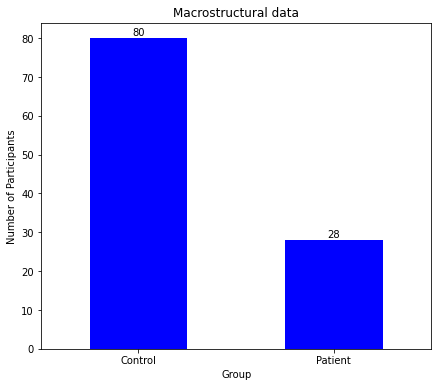

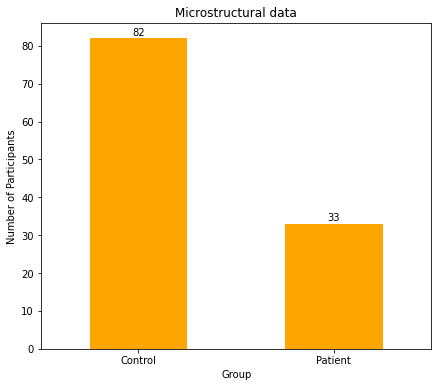

In [137]:
import matplotlib.pyplot as plt

Group_CT = demographic_CT['Group'].value_counts()
plt.figure(figsize=(7, 6))

ax = Group_CT.plot(kind='bar', rot=0, color="blue")
ax.set_title("Macrostructural data", y = 1)
ax.set_xlabel('Group')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Control', 'Patient'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

Group_FA = demographic_FA['Group'].value_counts()
plt.figure(figsize=(7, 6))
    
ax = Group_FA.plot(kind='bar', rot=0, color="orange")
ax.set_title("Microstructural data", y = 1)
ax.set_xlabel('Group')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Control', 'Patient'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

The plots clearly show an unequal distribution with more participants being controls for both **macrostructural** and **microstructural** data.

#### 1.1.1 Gender

The documentation on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) also provides label information for gender (1=male, 2=female). The code for visualizing the control and patients group can be adapted accordingly to show how many males and females 

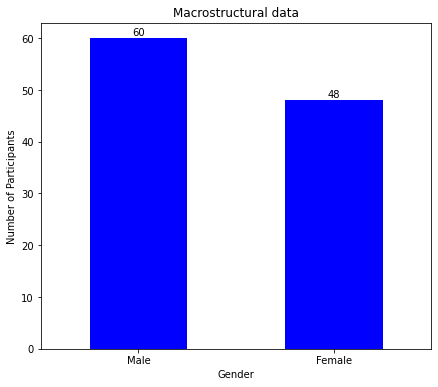

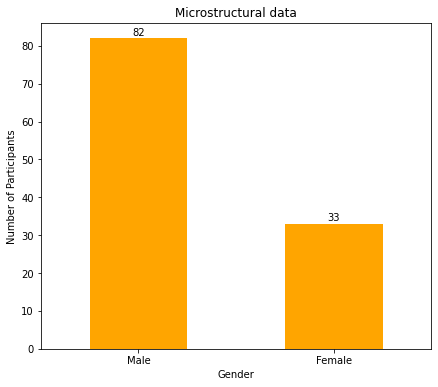

In [147]:
Gender_CT = demographic_CT['Sex'].value_counts()
plt.figure(figsize=(7, 6))

ax = Gender_CT.plot(kind='bar', rot=0, color="blue")
ax.set_title("Macrostructural data", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Male', 'Female'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

Gender_FA = demographic_FA['Sex'].value_counts()
plt.figure(figsize=(7, 6))
    
ax = Group_FA.plot(kind='bar', rot=0, color="orange")
ax.set_title("Microstructural data", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Male', 'Female'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

Again, as the plots show, there are more males than females for both **macrostructural** and **microstructural** data. 

#### 1.1.2 Age 

To get an inital idea of how the age distribution is for the **macrostructural** data, we can run the following command. Second, to have a look on how the ages differ within the groups, we can use raincloud plots.

In [141]:
#get age information
demographic_CT['Age'].describe()

count    108.000000
mean      31.231481
std       10.911373
min       18.000000
25%       22.000000
50%       29.000000
75%       38.250000
max       64.000000
Name: Age, dtype: float64

<span style="color:red">NOTE!</span> To be able to run the raincloud plots, ptitprince has to be installed. If you didn't install ptitprince yet, run the following cell and remove the #. 

In [148]:
#!pip install ptitprince

<AxesSubplot:title={'center':'Age Distribution in Control and Patient Group for Macrostructural Data'}, xlabel='Age', ylabel='Group'>

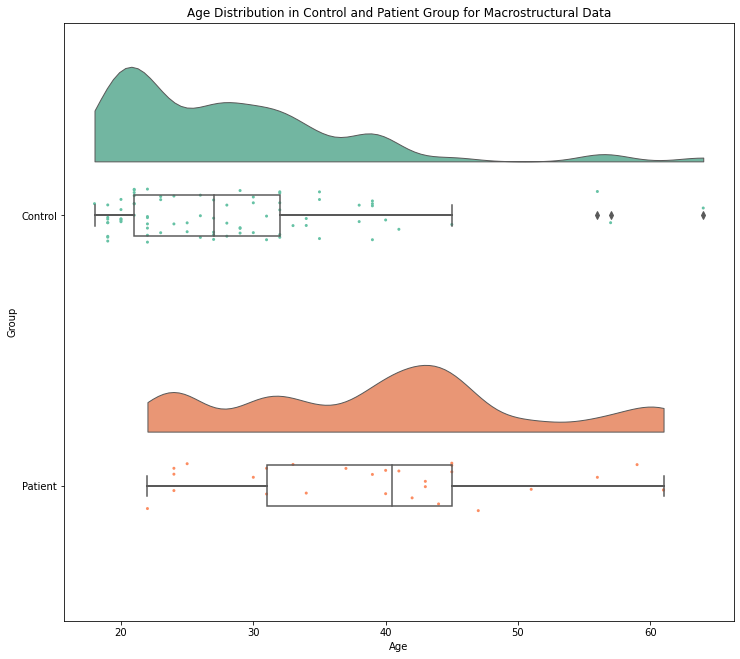

In [143]:
from ptitprince import PtitPrince as pt

f, ax = plt.subplots(figsize=(12, 11))
ax.set_title('Age Distribution in Control and Patient Group for Macrostructural Data')

pt.RainCloud(data = demographic_CT , x = "Group", y = "Age", ax = ax, orient='h')

Now, the same is done for the **microstructural** data. 

In [145]:
demographic_FA['Age'].describe()

count    115.000000
mean      36.043478
std       12.895934
min       19.000000
25%       25.000000
50%       34.000000
75%       43.000000
max       64.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age Distribution in Control and Patient Group for Microstructural Data'}, xlabel='Age', ylabel='Group'>

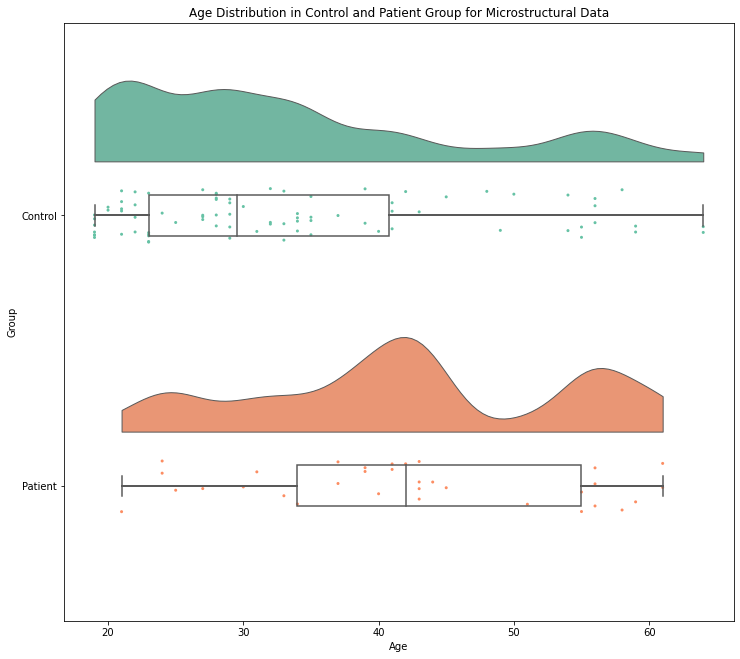

In [144]:
f, ax = plt.subplots(figsize=(12, 11))
ax.set_title('Age Distribution in Control and Patient Group for Microstructural Data')

pt.RainCloud(data = demographic_FA , x = "Group", y = "Age", ax = ax, orient='h')

As both plots show for both MRI metrics, the patient group involves participants that seem to be older in average 

## 2. Exploring the different modalities

In the following chapter, the different modalities are explored. Before getting a deeper look at the data, the derived form of the Desikan-Killiany Atlas with 308 cortical regions that is used for the **macro- and micro-structural data** is visualized.
As already mentioned above, there is a [github repository](https://github.com/RafaelRomeroGarcia/subParcellation) for that specific atlas with the required files therein. Since there is a poor documentation of the files and their content, it might be confusing which of them is actually required for visualization purposes. 


If you click on the repository link, the first folder with the title "500mm parcellation (308 regions)" is the relevant one. In the folder itself, there are two text files (.txt) with the coordinates and names of the 308 regions and two NIFTI files (.nii.gz). These are the files, that I used for visualization. For that, I used the nibabel and nilearn modules. 

In [ ]:
#import relevant modules

import nibabel as nb
from nilearn import plotting

In [ ]:
#load NIFTI file

atlas_path = os.path.join(os.pardir,'data','500.aparc_cortical_consecutive.nii')

atlas = nb.load(atlas_path)

In [ ]:
#plot atlas
plotting.plot_roi(atlas, draw_cross = False, annotate = False, colorbar=True, cmap='Paired', title="Cortical parcellation with 308 cortical regions")

There is also a.txt file that contains all the 308 cortical region names. In the following, the .txt file is read.

In [ ]:
#read the .txt files with region names

with open('../data/atlas/308_regions_names.txt') as f:
    lines = f.readlines()

In [ ]:
#region names
lines

In [ ]:
#proving 308 regions 
len(lines)

As we can see above, the 308 cortical region names are displayed in a chronological order from 1 to 308 for both left and right hemisphere. Each of the regions mostly consists of several parts as the names indicate.
Now, having visualized the used atlas with its regions and according labels, we can explore our first modality. 

### 2.1 Macro-structural data: cortical thickness (CT)

For the **macro-structural data**, T1-weighted MPRAGE images were used. The images were aquired with MPRAGE sequences, capturing high tissue contrast and providing high spatial resolution with whole brain coverage in a short scan time [(Wang et al.,2014)](https://doi.org/10.1371/journal.pone.0096899). These were already preprocessed by a prior pipeline [(Withtaker et al., 2016)](https://pubmed.ncbi.nlm.nih.gov/27457931/), using the command from FreeSurfer called "recon-all" [(Dale et al., 1999)](https://pubmed.ncbi.nlm.nih.gov/9931268/). The surface was parcellated according to the above displayed atlas into 308 regions. For each of those regions cortical thickness was estimated.

**Cortical thickness (CT)** is a measurement of the *width of gray matter* of the cerebral cortex, whereas *gray matter* marks the area from the pial surface to the internal surface (where *white matter* begins). It has been shown that **CT** correlates with the diagnosis and prognosis of several psychiatric and neurological conditions [(Tahedl, 2020)](https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02317-9).

In [ ]:
#load estimated CT data

CT_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_thickness_Dublin.csv')
CT_Dublin = pd.read_csv(CT_Dublin_path)


In [ ]:
CT_Dublin

In [ ]:
#adjust data frame

CT_Dublin_ad = CT_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)
CT_Dublin_ad

In [ ]:
#compute mean for patients and control in each brain region

df_mean = CT_Dublin_ad.groupby('Group').mean()

In [ ]:
df_mean

In [ ]:
#mean of cortical thickness for control and patients

df_mean.mean(axis=1)

As the mean values indicate, the control group has higher mean in **CT** over all brain areas compared to the patients group. Although the difference does not seem too big at first glance, visualization might help to have a better imagination of the data. Before visualizing the difference in mean values for control and patients, it might be helpful to reshape the dataframe as the columns indicate the respective groups and the rows each brain region.

In [ ]:
#switch colums and rows

df_trans = df_mean.T

In [ ]:
df_trans

In [ ]:
#import modules for visualization

import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#plot the CT

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=df_trans)
ax.set(xlabel='Groups', ylabel='Cortical Thickness')
plt.title("Distribution of means of Cortical Thickness for Controls vs. Patients", pad = '20')

The violin plot reveals that the overall cortical thickness in the patient group is lower compared to the controls. 

Group differences between metrics for different brain areas 

To get a broad idea and see, whether there is an effect in certain brain areas in a specific direction compared both groups, the differences in every brain region between the patient and control group is computed and plotted. 

In [ ]:
#compute difference

df_trans['diff'] = df_trans.iloc[:,0] - df_trans.iloc[:,1]

In [ ]:
df_trans

In [ ]:
#plot the difference 

# Initialize layout
fig, ax = plt.subplots(figsize = (20, 20))

# Make histogram
ax.hist(df_trans["diff"],bins= 100, edgecolor = 'black')

plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')

### 3.2 Micro-structural data: mean diffusivity (MD) and fractional anisotropy (FA)

The **micro-structural** data contains diffusion weighted images (DWI) from which regional cortical measures such as ***mean diffusivity (MD)*** and ***fractional anisotropy (FA)*** were estimated. 

In general, Diffusion MRI measures white matter fibres which makes it feasible to examine connections between different regions. For that, we look at how water diffuses in the brain which again provides information of the brain itself. The diffusion of water can be visualized as cloud if points which again can be approximated with a tensor model. Since there is a distinction in isotropic (characteristics are similar in all directions) vs anisotropic (characteristics e.g. faster in a given direction) diffusion, the tensor model might differ.

**MD** and **FA** are central characteristics of tensors. **MD** indicates how much diffusion there is inside a voxel. **FA** is a measurement of the anisotropy of diffusion with a value range between 0 and 1. While the a **FA** value of 0 stands for isotropic diffusion, the **FA** value of 1 indicates anisotropic diffusion.

In [ ]:
#read MD and FA datasets


MD_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_MD_cortexAv_mean_Dublin.csv')

FA_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_FA_cortexAv_mean_Dublin.csv')


MD_Dublin= pd.read_csv(MD_Dublin_path)
FA_Dublin = pd.read_csv(FA_Dublin_path)

In [ ]:
MD_Dublin

In [ ]:
#adjust data frame
MD_Dublin_ad = MD_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [ ]:
MD_Dublin_ad

In [ ]:
MD_Dublin_ad.describe()

In [ ]:
#compute mean for patients and control in each brain region

MD_df_mean = MD_Dublin_ad.groupby('Group').mean()

In [ ]:
MD_df_mean

In [ ]:
#mean of mean diffusivity for control and patients

MD_df_mean.mean(axis=1)

The values indicate descriptively that the control group has a lower average mean diffusivity compared to patients.

In [ ]:
#switch colums and rows

MD_df_trans = MD_df_mean.T

In [ ]:
MD_df_trans

In [ ]:
#plot the MD

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=MD_df_trans)
ax.set(xlabel='Groups', ylabel='Mean Diffusivity')
plt.title("Distribution of Mean Diffusivity Means for Controls vs. Patients", pad = '20')

Group differences

In [ ]:
#compute difference

MD_df_trans['diff'] = MD_df_trans.iloc[:,0] - MD_df_trans.iloc[:,1]

In [ ]:
MD_df_trans

In [ ]:
#plot the difference 

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Make histogram
ax.hist(MD_df_trans["diff"], edgecolor = 'black')


In [ ]:
FA_Dublin

In [ ]:
#adjust data frame

FA_Dublin_ad = FA_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [ ]:
FA_Dublin_ad

In [ ]:
FA_Dublin_ad.describe()

In [ ]:
#compute mean for patients and control in each brain region

FA_df_mean = FA_Dublin_ad.groupby('Group').mean()

In [ ]:
FA_df_mean

In [ ]:
#mean of fractional anisotropy for control and patients

FA_df_mean.mean(axis=1)

The values seem to indicate an isotropic diffusion in both control and patient groups.

In [ ]:
#switch colums and rows

FA_df_trans = FA_df_mean.T

In [ ]:
FA_df_trans

In [ ]:
#plot the FA

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=FA_df_trans)
ax.set(xlabel='Groups', ylabel='Fractional Anisotropy')
plt.title("Distribution of Fractional Anisotropy Means for Controls vs. Patients", pad = '20')

In [ ]:
#compute difference

FA_df_trans['diff'] = FA_df_trans.iloc[:,0] - FA_df_trans.iloc[:,1]

In [ ]:
FA_df_trans

In [ ]:
#plot the difference 

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Make histogram
ax.hist(FA_df_trans["diff"], edgecolor = 'black')